In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib.pyplot as plts
import seaborn as sns

##### Task : This Task is aimed at showing the steps of removing outliars, Data set has a normal distribution with limited or no  outliars
##### I will be adding a couple of outliars to the table and steps show how the Outliars I manually added will be removed.
##### Aim: This poves we can remove outliars from data with normal perfect distribution with the  given steps 

In [2]:
df =  pd.read_csv('./Data/NameHeighWeightMetric.csv')
df.shape

(10000, 5)

In [4]:
df2 = df.copy()
df.shape,df2.shape


((10000, 5), (10000, 5))

In [5]:
df2.head(5)

,Id,Height,Weight,Name,Gender
0,1,187.57,109.72,Mary,Female
1,2,174.71,73.62,Anna,Female
2,3,188.24,96.50,Emma,Female
3,4,182.20,99.81,Elizabeth,Female
4,5,177.50,93.60,Minnie,Female


In [6]:
df2.Height.describe()

count    10000.000000
mean       168.573573
std          9.772756
min        137.830000
25%        161.300000
50%        168.450000
75%        175.702500
max        200.660000
Name: Height, dtype: float64

In [7]:
df2.Weight.describe()

count    10000.000000
mean        73.228059
std         14.564130
min         29.350000
25%         61.607500
50%         73.125000
75%         84.902500
max        122.470000
Name: Weight, dtype: float64

In [11]:
##### Starting with some data exploration  to find height and geright by Gender

dataMale = df2[df2['Gender'] == 'Male']
dataMale

In [8]:
dataMale = df2[df2['Gender'] == 'Male']
dataMale.head(5)

,Id,Height,Weight,Name,Gender
942,943,180.65,89.51,John,Male
943,944,159.52,67.41,William,Male
944,945,179.86,91.27,James,Male
945,946,176.66,90.35,Charles,Male
946,947,170.26,85.48,George,Male


In [9]:
dataFemale = df2[df2['Gender'] == 'Female']
dataFemale.head(5)

,Id,Height,Weight,Name,Gender
0,1,187.57,109.72,Mary,Female
1,2,174.71,73.62,Anna,Female
2,3,188.24,96.50,Emma,Female
3,4,182.20,99.81,Elizabeth,Female
4,5,177.50,93.60,Minnie,Female


In [10]:
dataMale.shape,dataFemale.shape

((4866, 5), (5134, 5))

In [13]:
#### Confirming we have an even distribution

<Axes: xlabel='Height', ylabel='Count'>

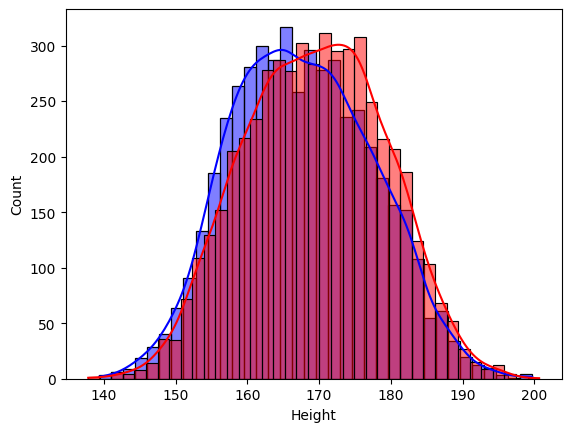

In [20]:
sns.histplot(dataMale.Height,kde= True,color='blue')
sns.histplot(dataFemale.Height,kde= True,color='red')

In [21]:
##### Using the Full Data Set so I can get outliars

In [22]:
meanHeights = df2.Height.mean()
meanHeights

np.float64(168.573573)

In [23]:
stdHeight = df2.Height.std()
stdHeight

np.float64(9.772755626686104)

In [ ]:
meanMaleHeight = dataMale.Height.mean()
meanMaleHeight

In [ ]:
meanMaleHeight = dataMale.Height.mean()
meanMaleHeight